In [1]:
import ccxt
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy.interpolate import interp1d
from talib import RSI, EMA

### Load historical XBTUSD market data
The Open, High, Low, Close (OHLC or candle) data here ranges from 01-Jan-2019 to 01-Nov-2020

In [2]:
df = pd.read_parquet('data/XBTUSD.parquet')

print(f'{len(df)} market data points')
df.head()

966240 market data points


,time,open,high,low,close,vol
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0


### Calculate RSI TA-Lib package
Use default 14 time period for Relative Strength Index (RSI)

In [3]:
df['rsi'] = RSI(df['close'])
df.head(20)

,time,open,high,low,close,vol,rsi
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0,NaN
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0,NaN
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0,NaN
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0,NaN
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0,NaN
5,2019-01-01 00:06:00,3688.5,3689.0,3688.5,3688.5,105867.0,NaN
6,2019-01-01 00:07:00,3688.5,3689.0,3686.0,3686.0,883486.0,NaN
7,2019-01-01 00:08:00,3686.0,3686.5,3684.5,3684.5,334053.0,NaN
8,2019-01-01 00:09:00,3684.5,3685.0,3684.5,3685.0,62139.0,NaN
9,2019-01-01 00:10:00,3685.0,3685.5,3684.5,3685.5,681316.0,NaN


### Distribution of RSI 

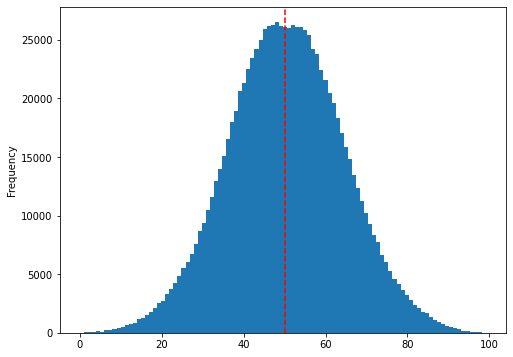

In [4]:
df['rsi'].plot(kind='hist', bins=100, figsize=(8, 6))
plt.axvline(50, color='red', linestyle='--')

### Plot close price vs RSI for a time period

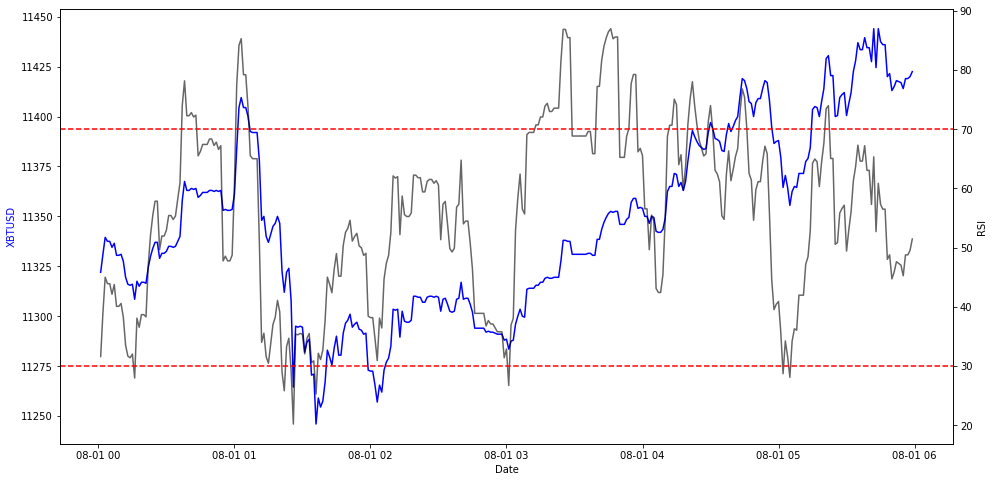

In [5]:
start_time = datetime.datetime(2020, 8, 1, 0)
end_time = datetime.datetime(2020, 8, 1, 6)

xf = df[(df['time'] > start_time) & (df['time'] < end_time)]

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(xf['time'], xf['close'], 'b-')
ax2.plot(xf['time'], xf['rsi'], 'k-', alpha=0.6)

ax1.set_xlabel('Date')
ax1.set_ylabel('XBTUSD', color='b')
ax2.set_ylabel('RSI', color='k')

ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

### Trade programmatically using CCXT library

In [2]:
API = ccxt.bitmex({
    'apiKey': os.environ['BX_KEY'],
    'secret': os.environ['BX_SECRET']
})

### Load historical candle data from API

In [8]:
candles = API.publicGetTradeBucketed(params={
    'binSize': '1m',
    'symbol': 'XBTUSD',
    'reverse': True
})

candles[:2]

[{'timestamp': '2020-11-04T18:39:00.000Z',
  'symbol': 'XBTUSD',
  'open': 14122.5,
  'high': 14127,
  'low': 14117,
  'close': 14117.5,
  'trades': 320,
  'volume': 2152005,
  'vwap': 14124.2938,
  'lastSize': 1,
  'turnover': 15237077004,
  'homeNotional': 152.37077004000002,
  'foreignNotional': 2152005},
 {'timestamp': '2020-11-04T18:38:00.000Z',
  'symbol': 'XBTUSD',
  'open': 14119,
  'high': 14123,
  'low': 14119,
  'close': 14122.5,
  'trades': 87,
  'volume': 101114,
  'vwap': 14122.2991,
  'lastSize': 13,
  'turnover': 716065648,
  'homeNotional': 7.16065648,
  'foreignNotional': 101114}]

### RSI strategy idea

In [18]:
def iso_to_unix(ts):
    return round(1000 * dateutil.parser.parse(ts).timestamp())

candle = {iso_to_unix(c['timestamp']): c['close'] for c in candles}
times, closes = zip(*sorted(candle.items()))

In [10]:
def hypo_rsi(closes, ret):
    return RSI(np.append(closes, [closes[-1] * (1 + ret)]))[-1]


returns = np.linspace(-.02, .02, 100)
rsi_data = [hypo_rsi(closes, r) for r in returns]

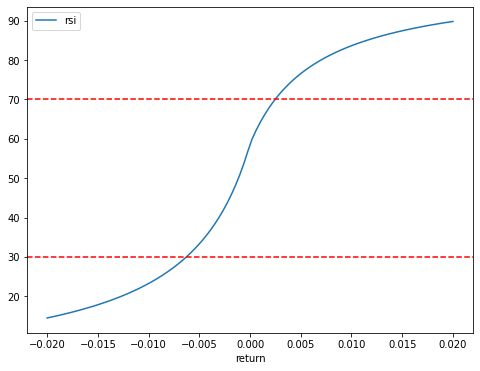

In [11]:
rsi = pd.DataFrame({'return': returns, 'rsi': rsi_data})

rsi.plot(x='return', y='rsi', figsize=(8, 6))
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')

In [12]:
func = interp1d(rsi_data, returns, kind='cubic')

func(30), func(70)

(array(-0.00627402), array(0.0024738))

### Get all open positions

In [14]:
risk = API.privateGetPosition()

risk

[{'account': 1372932,
  'symbol': 'XBTUSD',
  'currency': 'XBt',
  'underlying': 'XBT',
  'quoteCurrency': 'USD',
  'commission': 0.00075,
  'initMarginReq': 0.01,
  'maintMarginReq': 0.0035,
  'riskLimit': 20000000000,
  'leverage': 100,
  'crossMargin': True,
  'deleveragePercentile': None,
  'rebalancedPnl': 7384,
  'prevRealisedPnl': -18696,
  'prevUnrealisedPnl': 0,
  'prevClosePrice': 13850.46,
  'openingTimestamp': '2020-11-04T15:00:00.000Z',
  'openingQty': -500,
  'openingCost': 3610500,
  'openingComm': -2717,
  'openOrderBuyQty': 500,
  'openOrderBuyCost': -3627000,
  'openOrderBuyPremium': 0,
  'openOrderSellQty': 500,
  'openOrderSellCost': -3575000,
  'openOrderSellPremium': 0,
  'execBuyQty': 500,
  'execBuyCost': 3599500,
  'execSellQty': 0,
  'execSellCost': 0,
  'execQty': 500,
  'execCost': -3599500,
  'execComm': -899,
  'currentTimestamp': '2020-11-04T15:42:05.396Z',
  'currentQty': 0,
  'currentCost': 11000,
  'currentComm': -3616,
  'realisedCost': 11000,
  'unre

### Place order in market

In [4]:
payload = {'orders': [{
    'symbol': 'XBTUSD',
    'price': 15329,
    'orderQty': -200,
    'ordType': 'Limit',
    'execInst': 'ParticipateDoNotInitiate'
}]}

API.privatePostOrderBulk(payload)

[{'orderID': '70b79d1e-1b47-44a9-bf5d-529b0ee6f3e1',
  'clOrdID': '',
  'clOrdLinkID': '',
  'account': 1372932,
  'symbol': 'XBTUSD',
  'side': 'Sell',
  'simpleOrderQty': None,
  'orderQty': 200,
  'price': 15329,
  'displayQty': None,
  'stopPx': None,
  'pegOffsetValue': None,
  'pegPriceType': '',
  'currency': 'USD',
  'settlCurrency': 'XBt',
  'ordType': 'Limit',
  'timeInForce': 'GoodTillCancel',
  'execInst': 'ParticipateDoNotInitiate',
  'contingencyType': '',
  'exDestination': 'XBME',
  'ordStatus': 'New',
  'triggered': '',
  'workingIndicator': True,
  'ordRejReason': '',
  'simpleLeavesQty': None,
  'leavesQty': 200,
  'simpleCumQty': None,
  'cumQty': 0,
  'avgPx': None,
  'multiLegReportingType': 'SingleSecurity',
  'text': 'Submitted via API.',
  'transactTime': '2020-11-10T20:06:07.476Z',
  'timestamp': '2020-11-10T20:06:07.476Z'}]

### Cancel all open orders

In [12]:
# API.privateDeleteOrderAll()

### Model improvement idea: use exponential moving average (EMA)
- Only place a sell order if 5 period EMA is below 20 period EMA
- Only place a buy order if 5 period EMA is above 20 period EMA

In [9]:
df['rsi_5'] = EMA(df['close'], 5)
df['rsi_20'] = EMA(df['close'], 20)

df.head(25)

,time,open,high,low,close,vol,rsi,rsi_5,rsi_20
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0,NaN,NaN,NaN
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0,NaN,NaN,NaN
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0,NaN,NaN,NaN
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0,NaN,NaN,NaN
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0,NaN,3690.800000,NaN
5,2019-01-01 00:06:00,3688.5,3689.0,3688.5,3688.5,105867.0,NaN,3690.033333,NaN
6,2019-01-01 00:07:00,3688.5,3689.0,3686.0,3686.0,883486.0,NaN,3688.688889,NaN
7,2019-01-01 00:08:00,3686.0,3686.5,3684.5,3684.5,334053.0,NaN,3687.292593,NaN
8,2019-01-01 00:09:00,3684.5,3685.0,3684.5,3685.0,62139.0,NaN,3686.528395,NaN
9,2019-01-01 00:10:00,3685.0,3685.5,3684.5,3685.5,681316.0,NaN,3686.185597,NaN
